# FL experiment with FairFed

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import tomllib as tl

from model import network
from declearn.quickrun import quickrun

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from aif360.sklearn.datasets import fetch_adult

/Users/martina/Desktop/fairfed-experiment/.venv/lib/python3.11/site-packages/declearn/model/tensorflow/utils/_gpu.py:71: UserWarning: Cannot use a GPU device: either CUDA is unavailable or no GPU is visible to tensorflow.
  warnings.warn(


## Model

In [2]:
network.summary()  # network is a `tensorflow.keras.Model` instance

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

## Run experiment

In [3]:
await quickrun(config="config.toml")

2025-02-04 11:43:24,625:Server:INFO: Server is now starting...
2025-02-04 11:43:24,637:Server:INFO: server listening on 127.0.0.1:8765
2025-02-04 11:43:24,637:Server:INFO: Starting clients registration process.
2025-02-04 11:43:25,642:Server:INFO: connection open
2025-02-04 11:43:25,643:Server:INFO: New connection from ('127.0.0.1', 54596)
2025-02-04 11:43:25,644:Server:INFO: connection open
2025-02-04 11:43:25,644:Server:INFO: New connection from ('127.0.0.1', 54597)
2025-02-04 11:43:25,645:Server:INFO: connection open
2025-02-04 11:43:25,646:Server:INFO: New connection from ('127.0.0.1', 54598)
2025-02-04 11:43:25,647:Server:INFO: connection open
2025-02-04 11:43:25,647:Server:INFO: New connection from ('127.0.0.1', 54599)
2025-02-04 11:43:25,648:Server:INFO: connection open
2025-02-04 11:43:25,650:Server:INFO: New connection from ('127.0.0.1', 54600)
2025-02-04 11:43:25,654:Server:INFO: Registering client 'client_0' for training.
2025-02-04 11:43:25,655:Server:INFO: Registering clie

## Results

In [4]:
res = pd.read_csv("results/server/metrics.csv")
res.head()

,timestamp,accuracy,precision,recall,f-score,loss
0,25-02-04_11-43-33,0.762730,0.681614,0.042733,0.080423,0.549662
1,25-02-04_11-43-38,0.781911,0.799669,0.135789,0.232156,0.483073
2,25-02-04_11-43-43,0.801160,0.780488,0.251898,0.380871,0.444370
3,25-02-04_11-43-47,0.810034,0.752611,0.324150,0.453134,0.421657
4,25-02-04_11-43-49,0.820000,0.755556,0.382345,0.507747,0.407005


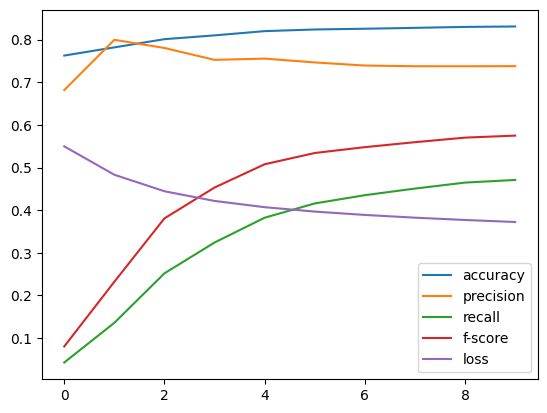

In [5]:
res_fig = res.plot()